# Maciej Legas 2031545 Coursework 2 CSCM35

## Imports

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import datetime as dt
from timeit import default_timer as timer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

## Loading the data and determining its properties

In [2]:
house_data = pd.read_csv('House_Price_Dataset.csv')

In [3]:
house_data.head()

Suburb             Address  Rooms Type      Price Method  Seller  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

         Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  03/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  03/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  04/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  04/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  04/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Latitude  Longitude             RegionName  \
0        NaN  Yarra City Council -37.8014   144.9958  Northern Metropolitan   
1        NaN  Yarra City Council -37.7996   144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council -37.8079   144.9934  Northern Metropolitan   
3        NaN  Yarra City Council -37.8114   145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council -37.8093   144.9944  Northern Metropolitan   

  PropertyCount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

<AxesSubplot:>

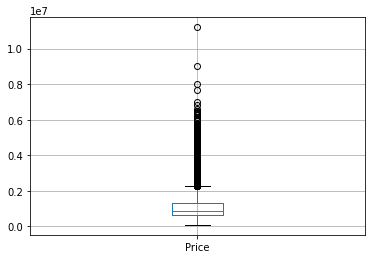

In [4]:
house_data.boxplot(column="Price")

<AxesSubplot:>

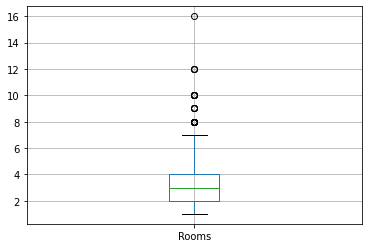

In [5]:
house_data.boxplot(column="Rooms")

In [6]:
house_data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             1
Postcode             1
Rooms2            8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longitude         7976
RegionName           3
PropertyCount        3
dtype: int64

In [7]:
house_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
Seller            object
Date              object
Distance         float64
Postcode         float64
Rooms2           float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longitude        float64
RegionName        object
PropertyCount    float64
dtype: object

## Pre-processing the data
### Remove missing values
Fix the fields where region name and property count is NaN.

In [8]:
house_data[house_data['RegionName'].isna()]

Suburb           Address  Rooms Type     Price Method  Seller  \
18523    Footscray  2/16 Stafford St      2    u  710000.0      S     Jas   
26888   Camberwell   2/3 Kingsley St      2    h  825000.0     VB  Jellis   
29483  Fawkner Lot      1/3 Brian St      3    h  616000.0     SP    Brad   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
18523  15/07/2017       5.1    3011.0  ...       NaN  NaN       NaN   
26888  11/11/2017       7.7    3124.0  ...       NaN  NaN       NaN   
29483  06/01/2018       NaN       NaN  ...       NaN  NaN       NaN   

       BuildingArea  YearBuilt  CouncilArea Latitude  Longitude  RegionName  \
18523           NaN        NaN          NaN      NaN        NaN         NaN   
26888           NaN        NaN          NaN      NaN        NaN         NaN   
29483           NaN        NaN          NaN      NaN        NaN         NaN   

      PropertyCount  
18523           NaN  
26888           NaN  
29483           NaN  

[3 rows x 21 columns]

In [9]:
house_data[house_data['Suburb'] == "Footscray"].head()

Suburb           Address  Rooms Type      Price Method   Seller  \
4377  Footscray  4/33 Ballarat Rd      3    t   585000.0      S   Nelson   
4378  Footscray  202/51 Gordon St      1    u    85000.0     PI  Burnham   
4379  Footscray     4 Adelaide St      4    h  1225000.0     SP   Nelson   
4380  Footscray  11/44 Everard St      2    u   431000.0     SP      Jas   
4381  Footscray        9 Lynch St      3    h  1003000.0      S   Naison   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
4377  03/09/2016       6.4    3011.0  ...       1.0  1.0     259.0   
4378  03/09/2016       6.4    3011.0  ...       1.0  0.0       0.0   
4379  03/12/2016       6.4    3011.0  ...       2.0  1.0     319.0   
4380  03/12/2016       6.4    3011.0  ...       1.0  1.0       0.0   
4381  03/12/2016       6.4    3011.0  ...       1.0  1.0     292.0   

      BuildingArea  YearBuilt               CouncilArea Latitude  Longitude  \
4377           NaN        NaN  Maribyrnong City Council -37.7955   144.9063   
4378           NaN     2007.0  Maribyrnong City Council -37.7911   144.8900   
4379         130.0     1915.0  Maribyrnong City Council -37.7943   144.8875   
4380           NaN        NaN  Maribyrnong City Council -37.7963   144.8853   
4381          98.0     1900.0  Maribyrnong City Council -37.7970   144.9051   

                RegionName PropertyCount  
4377  Western Metropolitan        7570.0  
4378  Western Metropolitan        7570.0  
4379  Western Metropolitan        7570.0  
4380  Western Metropolitan        7570.0  
4381  Western Metropolitan        7570.0  

[5 rows x 21 columns]

In [10]:
house_data.at[18523, "RegionName"] = "Western Metropolitan"
house_data.at[18523, "CouncilArea"] = "Maribyrnong City Council"

In [11]:
house_data[house_data['Suburb'] == "Camberwell"].head()

Suburb           Address  Rooms Type      Price Method    Seller  \
2618  Camberwell    28 Brinsley Rd      4    h  2650000.0      S    Jellis   
2619  Camberwell  2/1 Glen Iris Rd      3    t  1615000.0      S  Marshall   
2620  Camberwell       6 Kalang Rd      3    h        NaN     PN    Rayner   
2621  Camberwell    1288 Toorak Rd      4    h  3225000.0     SA        RT   
2622  Camberwell      1/19 Alma Rd      3    h        NaN      S  Marshall   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
2618  03/09/2016       7.8    3124.0  ...       2.0  1.0     652.0   
2619  03/09/2016       7.8    3124.0  ...       1.0  2.0     389.0   
2620  03/09/2016       7.8    3124.0  ...       1.0  1.0     980.0   
2621  03/09/2016       7.8    3124.0  ...       3.0  2.0     934.0   
2622  03/12/2016       7.8    3124.0  ...       2.0  2.0     332.0   

      BuildingArea  YearBuilt              CouncilArea Latitude  Longitude  \
2618         189.0     1890.0  Boroondara City Council -37.8286   145.0686   
2619           NaN        NaN  Boroondara City Council -37.8435   145.0695   
2620         154.0     1930.0  Boroondara City Council -37.8441   145.0775   
2621           NaN        NaN  Boroondara City Council -37.8496   145.0869   
2622           NaN     1995.0  Boroondara City Council -37.8372   145.0585   

                 RegionName PropertyCount  
2618  Southern Metropolitan        8920.0  
2619  Southern Metropolitan        8920.0  
2620  Southern Metropolitan        8920.0  
2621  Southern Metropolitan        8920.0  
2622  Southern Metropolitan        8920.0  

[5 rows x 21 columns]

In [12]:
house_data.at[26888, "RegionName"] = "Southern Metropolitan"
house_data.at[26888, "CouncilArea"] = "Boroondara City Council"

In [13]:
house_data[house_data['Suburb'] == "Fawkner Lot"]

Suburb       Address  Rooms Type     Price Method Seller  \
29483  Fawkner Lot  1/3 Brian St      3    h  616000.0     SP   Brad   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
29483  06/01/2018       NaN       NaN  ...       NaN  NaN       NaN   

       BuildingArea  YearBuilt  CouncilArea Latitude  Longitude  RegionName  \
29483           NaN        NaN          NaN      NaN        NaN         NaN   

      PropertyCount  
29483           NaN  

[1 rows x 21 columns]

In [14]:
# Nothing that we can do here since there are no other addresses in Fawkner Lot, therefore we remove the row from the dataset.
house_data = house_data.drop(house_data.index[29483])

Fill missing values of the chosen columns with the median values of houses located in the same suburb, with the same amount of rooms and type of property

In [15]:
# Reference: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

house_data['Bathroom'] = house_data.groupby(['Suburb', 'Rooms', 'Type'])['Bathroom']\
    .transform(lambda x: x.fillna(x.median()))

house_data['Landsize'] = house_data.groupby(['Suburb', 'Rooms', 'Type'])['Landsize']\
    .transform(lambda x: x.fillna(x.median()))

house_data['YearBuilt'] = house_data.groupby(['Suburb', 'Rooms', 'Type'])['YearBuilt']\
    .transform(lambda x: x.fillna(x.median()))

house_data['Car'] = house_data.groupby(['Suburb', 'Rooms', 'Type'])['Car']\
    .transform(lambda x: x.fillna(x.median()))

house_data['PropertyCount'] = house_data.groupby(['Suburb', 'Rooms', 'Type'])['PropertyCount']\
    .transform(lambda x: x.fillna(x.median()))

# Below warnings come from NaN values (i.e. there was no findable median to use)

C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarnin

In [16]:
house_data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2            8216
Bathroom           502
Car                511
Landsize           758
BuildingArea     21114
YearBuilt         1103
CouncilArea          0
Latitude          7975
Longitude         7975
RegionName           0
PropertyCount        0
dtype: int64

We still have some NaN values. Let's try to fill them, this time with the median values of houses located in the same region, with the same amount of rooms and type of property.

In [17]:
# Reference: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

house_data['Bathroom'] = house_data.groupby(['RegionName', 'Rooms', 'Type'])['Bathroom']\
    .transform(lambda x: x.fillna(x.median()))

house_data['Landsize'] = house_data.groupby(['RegionName', 'Rooms', 'Type'])['Landsize']\
    .transform(lambda x: x.fillna(x.median()))

house_data['YearBuilt'] = house_data.groupby(['RegionName', 'Rooms', 'Type'])['YearBuilt']\
    .transform(lambda x: x.fillna(x.median()))
    
house_data['Car'] = house_data.groupby(['RegionName', 'Rooms', 'Type'])['Car']\
    .transform(lambda x: x.fillna(x.median()))

house_data['PropertyCount'] = house_data.groupby(['RegionName', 'Rooms', 'Type'])['PropertyCount']\
    .transform(lambda x: x.fillna(x.median()))

# Below warnings come from NaN values (i.e. there was no findable median to use)

C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarnin

In [18]:
house_data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2            8216
Bathroom            11
Car                 12
Landsize            15
BuildingArea     21114
YearBuilt           23
CouncilArea          0
Latitude          7975
Longitude         7975
RegionName           0
PropertyCount        0
dtype: int64

We are again left with a small number of NaN values. Rows with such will need to be ultimately dropped, however before that is done, let's take a look at the "Seller" column.

<AxesSubplot:>

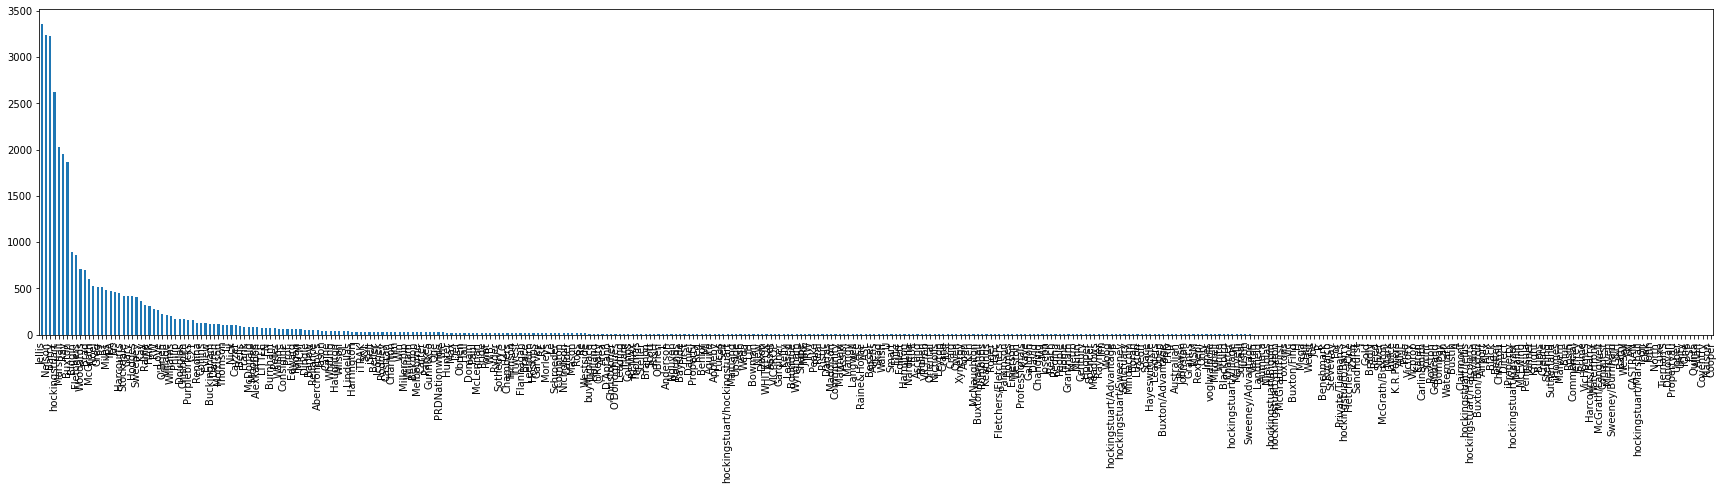

In [19]:
house_data["Seller"].value_counts().plot(kind='bar', figsize=(30, 6))

There is quite a lot of collected agencies in this dataset. While we can drop the "Suburb" column later as we have other geographical data to use, we should however try to include this column. We need to do it here as if we drop NaN values before handling the "Seller" column, we would have a loss of information.

In [20]:
seller_counts = house_data["Seller"].value_counts()

In [21]:
seller_counts

Jellis           3359
Nelson           3236
Barry            3235
hockingstuart    2623
Marshall         2027
                 ... 
Quinta              1
Allan               1
Coventry            1
Naison              1
Cooper              1
Name: Seller, Length: 388, dtype: int64

In [22]:
# Below line suppresses warnings about Pandas being unsure about this operation
pd.options.mode.chained_assignment = None 

house_data["Seller"][house_data["Seller"].isin(seller_counts[seller_counts < 100].index)] = "Under 100"
house_data["Seller"][house_data["Seller"].isin(seller_counts[(seller_counts >= 100) & (seller_counts < 200)].index)] = "100 to 200"
house_data["Seller"][house_data["Seller"].isin(seller_counts[(seller_counts >= 200) & (seller_counts < 500)].index)] = "200 to 500"
house_data["Seller"][house_data["Seller"].isin(seller_counts[(seller_counts >= 500) & (seller_counts < 1000)].index)] = "500 to 1000"
house_data["Seller"][house_data["Seller"].isin(seller_counts[seller_counts >= 1000].index)] = "Over 1000"

In [23]:
house_data["Seller"].value_counts()

Over 1000      18298
200 to 500      5694
500 to 1000     5333
Under 100       3575
100 to 200      1956
Name: Seller, dtype: int64

In [24]:
house_data

Suburb             Address  Rooms Type      Price Method  \
0      Abbotsford       68 Studley St      2    h        NaN     SS   
1      Abbotsford        85 Turner St      2    h  1480000.0      S   
2      Abbotsford     25 Bloomburg St      2    h  1035000.0      S   
3      Abbotsford  18/659 Victoria St      3    u        NaN     VB   
4      Abbotsford        5 Charles St      3    h  1465000.0     SP   
...           ...                 ...    ...  ...        ...    ...   
34852  Yarraville         13 Burns St      4    h  1480000.0     PI   
34853  Yarraville       29A Murray St      2    h   888000.0     SP   
34854  Yarraville      147A Severn St      2    t   705000.0      S   
34855  Yarraville    12/37 Stephen St      3    h  1140000.0     SP   
34856  Yarraville    3 Tarrengower St      2    h  1020000.0     PI   

            Seller        Date  Distance  Postcode  ...  Bathroom  Car  \
0        Over 1000  03/09/2016       2.5    3067.0  ...       1.0  1.0   
1      500 to 1000  03/12/2016       2.5    3067.0  ...       1.0  1.0   
2      500 to 1000  04/02/2016       2.5    3067.0  ...       1.0  0.0   
3        Under 100  04/02/2016       2.5    3067.0  ...       2.0  1.0   
4      500 to 1000  04/03/2017       2.5    3067.0  ...       2.0  0.0   
...            ...         ...       ...       ...  ...       ...  ...   
34852   200 to 500  24/02/2018       6.3    3013.0  ...       1.0  3.0   
34853   200 to 500  24/02/2018       6.3    3013.0  ...       2.0  1.0   
34854   200 to 500  24/02/2018       6.3    3013.0  ...       1.0  2.0   
34855    Over 1000  24/02/2018       6.3    3013.0  ...       1.0  1.0   
34856   200 to 500  24/02/2018       6.3    3013.0  ...       1.0  0.0   

       Landsize  BuildingArea  YearBuilt               CouncilArea  Latitude  \
0         126.0           NaN     1900.0        Yarra City Council -37.80140   
1         202.0           NaN     1900.0        Yarra City Council -37.79960   
2         156.0          79.0     1900.0        Yarra City Council -37.80790   
3           0.0           NaN     2005.0        Yarra City Council -37.81140   
4         134.0         150.0     1900.0        Yarra City Council -37.80930   
...         ...           ...        ...                       ...       ...   
34852     593.0           NaN     1935.0  Maribyrnong City Council -37.81053   
34853      98.0         104.0     2018.0  Maribyrnong City Council -37.81551   
34854     220.0         120.0     2000.0  Maribyrnong City Council -37.82286   
34855     347.5           NaN     1940.0  Maribyrnong City Council       NaN   
34856     250.0         103.0     1930.0  Maribyrnong City Council -37.81810   

       Longitude             RegionName PropertyCount  
0      144.99580  Northern Metropolitan        4019.0  
1      144.99840  Northern Metropolitan        4019.0  
2      144.99340  Northern Metropolitan        4019.0  
3      145.01160  Northern Metropolitan        4019.0  
4      144.99440  Northern Metropolitan        4019.0  
...          ...                    ...           ...  
34852  144.88467   Western Metropolitan        6543.0  
34853  144.88826   Western Metropolitan        6543.0  
34854  144.87856   Western Metropolitan        6543.0  
34855        NaN   Western Metropolitan        6543.0  
34856  144.89351   Western Metropolitan        6543.0  

[34856 rows x 21 columns]

As we can see, we preserved the seller information. We can now drop NaN rows and Price here.

In [25]:
house_data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2            8216
Bathroom            11
Car                 12
Landsize            15
BuildingArea     21114
YearBuilt           23
CouncilArea          0
Latitude          7975
Longitude         7975
RegionName           0
PropertyCount        0
dtype: int64

In [26]:
house_data = house_data.dropna(subset=["Price", "Bathroom", "Landsize", "Car", "YearBuilt"])

In [27]:
house_data.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
Seller               0
Date                 0
Distance             0
Postcode             0
Rooms2            6430
Bathroom             0
Car                  0
Landsize             0
BuildingArea     16576
YearBuilt            0
CouncilArea          0
Latitude          6244
Longitude         6244
RegionName           0
PropertyCount        0
dtype: int64

Rows have been successfully dropped.
### Convert data types
Convert float types to integers, and make "Date" a nominal value.

In [28]:
house_data['Postcode'] = house_data['Postcode'].astype(int)
house_data['Bathroom'] = house_data['Bathroom'].astype(int)
house_data['YearBuilt'] = house_data['YearBuilt'].astype(int)
house_data['PropertyCount'] = house_data['PropertyCount'].astype(int)

In [29]:
house_data["Date"]

1        03/12/2016
2        04/02/2016
4        04/03/2017
5        04/03/2017
6        04/06/2016
            ...    
34852    24/02/2018
34853    24/02/2018
34854    24/02/2018
34855    24/02/2018
34856    24/02/2018
Name: Date, Length: 27232, dtype: object

In [30]:
# Reference: https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date

house_data['Date'] = pd.to_datetime(house_data['Date'])
house_data['Date'] = house_data['Date'].map(dt.datetime.toordinal)

In [31]:
house_data['Date']

1        736035
2        736056
4        736422
5        736422
6        736060
          ...  
34852    736749
34853    736749
34854    736749
34855    736749
34856    736749
Name: Date, Length: 27232, dtype: int64

In [32]:
house_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
Seller            object
Date               int64
Distance         float64
Postcode           int32
Rooms2           float64
Bathroom           int32
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt          int32
CouncilArea       object
Latitude         float64
Longitude        float64
RegionName        object
PropertyCount      int32
dtype: object

Successful conversion of types.
### One-Hot Encoding
Let's check what is the amount of unique values for each categorical data, except for the "Seller" field as we already worked on it before the drop of NaN rows.

In [33]:
print("Suburbs:", len(house_data["Suburb"].unique()))
print("Addresses:", len(house_data["Address"].unique()))
print("Types:", len(house_data["Type"].unique()))
print("Methods:", len(house_data["Method"].unique()))
print("Council Areas:", len(house_data["CouncilArea"].unique()))
print("Region Names:", len(house_data["RegionName"].unique()))

Suburbs: 344
Addresses: 26737
Types: 3
Methods: 5
Council Areas: 33
Region Names: 8


"Suburb" and "Address", as well as "CouncilArea" columns are just too large to one-hot encode. We will drop them from the data.

In [34]:
house_data = house_data.drop(columns=["Suburb", "Address", "CouncilArea"])

Now let's move onto categorical data columns that we have left, which are "Type", "Seller" and "RegionName", which we will one-hot encode below.

In [35]:
type_onehot = pd.get_dummies(house_data["Type"])
seller_onehot = pd.get_dummies(house_data["Seller"])
region_onehot = pd.get_dummies(house_data["RegionName"])
method_onehot = pd.get_dummies(house_data["Method"])

In [36]:
house_data = pd.concat([house_data, type_onehot, seller_onehot, region_onehot, method_onehot], axis=1)

In [37]:
print(house_data.columns.tolist())

['Rooms', 'Type', 'Price', 'Method', 'Seller', 'Date', 'Distance', 'Postcode', 'Rooms2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude', 'RegionName', 'PropertyCount', 'h', 't', 'u', '100 to 200', '200 to 500', '500 to 1000', 'Over 1000', 'Under 100', 'Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria', 'PI', 'S', 'SA', 'SP', 'VB']


We just need to drop the columns we used for one-hot encoding and we are good to go.

In [38]:
house_data = house_data.drop(columns=["Type", "Seller", "RegionName", "Method"])

### Correlation matrix

In [39]:
correlation_matrix = house_data.corr()

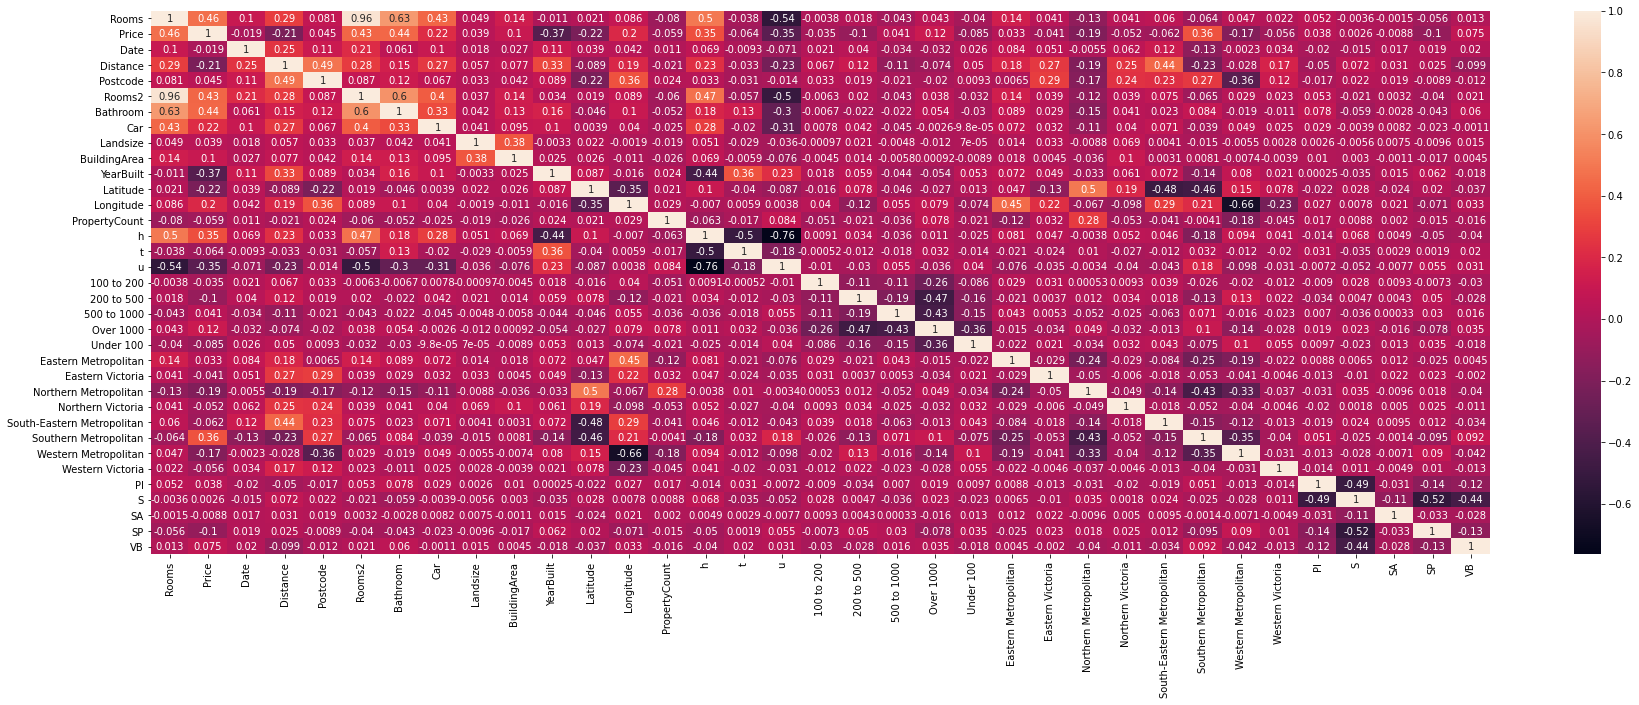

In [40]:
plt.figure(figsize=(30, 10))
sn.heatmap(correlation_matrix, annot=True)
plt.show()

By using the correlation matrix, we have established a number of columns that most likely will not help us in regression, therefore they will be dropped.

In [41]:
data_for_regression = house_data.drop(columns=['Rooms2', 'PI', 'S', 'SA', 'SP', 'VB', 'BuildingArea', 'Latitude', 'Longitude', 'Date', 'Postcode', 'Landsize', 'BuildingArea', 'PropertyCount'], axis=1)

In [42]:
print(data_for_regression.columns.tolist())

['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'YearBuilt', 'h', 't', 'u', '100 to 200', '200 to 500', '500 to 1000', 'Over 1000', 'Under 100', 'Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria']


## Fitting and evaluating regression models

In [43]:
# An integer is provided to the train test split parameter of random_state for reproducible results.
train, test = train_test_split(data_for_regression, test_size = 0.2, random_state=1337)

In [44]:
train.head()

Rooms      Price  Distance  Bathroom  Car  YearBuilt  h  t  u  \
3369       5  1725000.0       7.8         2  2.5       1920  1  0  0   
5058       3   810000.0      13.7         1  1.0       1960  0  0  1   
33965      3  1800000.0       9.7         1  2.0       1950  1  0  0   
25478      1   312000.0       7.5         1  1.0       1970  0  0  1   
9474       2   430000.0       6.1         1  1.0       1970  0  0  1   

       100 to 200  ...  Over 1000  Under 100  Eastern Metropolitan  \
3369            0  ...          1          0                     0   
5058            0  ...          1          0                     0   
33965           0  ...          1          0                     0   
25478           0  ...          0          0                     0   
9474            0  ...          0          0                     0   

       Eastern Victoria  Northern Metropolitan  Northern Victoria  \
3369                  0                      1                  0   
5058                  0                      0                  0   
33965                 0                      0                  0   
25478                 0                      0                  0   
9474                  0                      0                  0   

       South-Eastern Metropolitan  Southern Metropolitan  \
3369                            0                      0   
5058                            0                      1   
33965                           0                      1   
25478                           0                      0   
9474                            0                      1   

       Western Metropolitan  Western Victoria  
3369                      0                 0  
5058                      0                 0  
33965                     0                 0  
25478                     1                 0  
9474                      0                 0  

[5 rows x 22 columns]

In [45]:
test.head()

Rooms      Price  Distance  Bathroom  Car  YearBuilt  h  t  u  \
21687      2   870000.0      11.4         2  1.0       2004  0  1  0   
8091       3  1720000.0       4.5         2  1.0       1900  1  0  0   
15355      3   750000.0      17.2         2  1.0       1999  0  0  1   
17649      3   767500.0      17.9         2  2.0       1985  1  0  0   
32266      2   555000.0      10.4         1  1.0       2014  0  1  0   

       100 to 200  ...  Over 1000  Under 100  Eastern Metropolitan  \
21687           0  ...          0          0                     0   
8091            0  ...          1          0                     0   
15355           0  ...          0          0                     1   
17649           0  ...          1          0                     0   
32266           0  ...          1          0                     0   

       Eastern Victoria  Northern Metropolitan  Northern Victoria  \
21687                 0                      0                  0   
8091                  0                      0                  0   
15355                 0                      0                  0   
17649                 0                      1                  0   
32266                 0                      0                  0   

       South-Eastern Metropolitan  Southern Metropolitan  \
21687                           0                      1   
8091                            0                      1   
15355                           0                      0   
17649                           0                      0   
32266                           0                      0   

       Western Metropolitan  Western Victoria  
21687                     0                 0  
8091                      0                 0  
15355                     0                 0  
17649                     0                 0  
32266                     1                 0  

[5 rows x 22 columns]

In [46]:
print(train.shape)
print(test.shape)

(21785, 22)
(5447, 22)


In [47]:
x_train = train.loc[:, data_for_regression.columns != 'Price']
y_train = train['Price']

In [48]:
x_test = test.loc[:, data_for_regression.columns != 'Price']
y_test = test['Price']

In [49]:
start = timer()
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train.values, y_train.values)
end = timer()

In [50]:
linear_pred = linear_reg.predict(x_test.values)

print("Linear regression:")
print("MSE:", mean_squared_error(y_test, linear_pred))
print("MAE:", mean_absolute_error(y_test, linear_pred))
print("R2:", r2_score(y_test, linear_pred))
print("MRE:", max_error(y_test, linear_pred))
print(end - start, "seconds taken to fit the model.")

Linear regression:
MSE: 163471276942.3041
MAE: 268721.2153478979
R2: 0.5827238478949093
MRE: 4968261.5
0.051433612999971956 seconds taken to fit the model.


In [51]:
start = timer()
lasso_reg = linear_model.Lasso(alpha=0.01, max_iter=10000)
lasso_reg.fit(x_train.values, y_train.values)
end = timer()

C:\Users\Maciej\.conda\envs\BDML_M45\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416062409832464.0, tolerance: 903869807160.1344
  model = cd_fast.enet_coordinate_descent(


In [52]:
lasso_pred = lasso_reg.predict(x_test.values)

print("Lasso regression:")
print("MSE:", mean_squared_error(y_test, lasso_pred))
print("MAE:", mean_absolute_error(y_test, lasso_pred))
print("R2:", r2_score(y_test, lasso_pred))
print("MRE:", max_error(y_test, lasso_pred))
print(end - start, "seconds taken to fit the model.")

Lasso regression:
MSE: 163471938940.31052
MAE: 268724.89166245837
R2: 0.5827221580813471
MRE: 4968194.389247139
44.55621519599981 seconds taken to fit the model.


In [53]:
start = timer()
ridge_reg = linear_model.Ridge(alpha=0.01, max_iter=10000)
ridge_reg.fit(x_train.values, y_train.values)
end = timer()

In [54]:
ridge_pred = ridge_reg.predict(x_test.values)

print("Ridge regression:")
print("MSE:", mean_squared_error(y_test, ridge_pred))
print("MAE:", mean_absolute_error(y_test, ridge_pred))
print("R2:", r2_score(y_test, ridge_pred))
print("MRE:", max_error(y_test, ridge_pred))
print(end - start, "seconds taken to fit the model.")

Ridge regression:
MSE: 163471933557.3864
MAE: 268724.8125427508
R2: 0.5827221718217784
MRE: 4968194.033968499
0.019154236000076708 seconds taken to fit the model.


In [55]:
start = timer()
huber_reg = linear_model.HuberRegressor(max_iter=10000)
huber_reg.fit(x_train.values, y_train.values)
end = timer()

In [56]:
huber_pred = huber_reg.predict(x_test.values)

print("Huber regression:")
print("MSE:", mean_squared_error(y_test, huber_pred))
print("MAE:", mean_absolute_error(y_test, huber_pred))
print("R2:", r2_score(y_test, huber_pred))
print("MRE:", max_error(y_test, huber_pred))
print(end - start, "seconds taken to fit the model.")

Huber regression:
MSE: 182166878119.92386
MAE: 263794.6241756278
R2: 0.5350015283130909
MRE: 5817767.364901196
6.484848882000051 seconds taken to fit the model.


In [57]:
start = timer()
ransac_reg = linear_model.RANSACRegressor()
ransac_reg.fit(x_train.values, y_train.values)
end = timer()

In [58]:
ransac_pred = ransac_reg.predict(x_test.values)

print("RANSAC regression:")
print("MSE:", mean_squared_error(y_test, ransac_pred))
print("MAE:", mean_absolute_error(y_test, ransac_pred))
print("R2:", r2_score(y_test, ransac_pred))
print("MRE:", max_error(y_test, ransac_pred))
print(end - start, "seconds taken to fit the model.")

RANSAC regression:
MSE: 196498390365.378
MAE: 273121.262195475
R2: 0.4984189653363501
MRE: 5726709.683914224
0.5132950330000767 seconds taken to fit the model.


In [59]:
start = timer()
theilsen_reg = linear_model.TheilSenRegressor(max_iter=10000)
theilsen_reg.fit(x_train.values, y_train.values)
end = timer()

In [60]:
theilsen_pred = theilsen_reg.predict(x_test.values)

print("Theil-Sen regression:")
print("MSE:", mean_squared_error(y_test, theilsen_pred))
print("MAE:", mean_absolute_error(y_test, theilsen_pred))
print("R2:", r2_score(y_test, theilsen_pred))
print("MRE:", max_error(y_test, theilsen_pred))
print(end - start, "seconds taken to fit the model.")

Theil-Sen regression:
MSE: 200527527846.953
MAE: 298633.8404240218
R2: 0.4881342045143776
MRE: 5199841.568984165
18.140837145999967 seconds taken to fit the model.


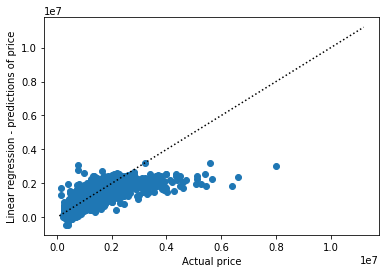

In [61]:
plt.figure()
plt.scatter(y_test, linear_pred)
plt.plot([data_for_regression["Price"].min(), data_for_regression["Price"].max()], [data_for_regression["Price"].min(), data_for_regression["Price"].max()], 'k:')
plt.xlabel("Actual price")
plt.ylabel("Linear regression - predictions of price")
plt.show()

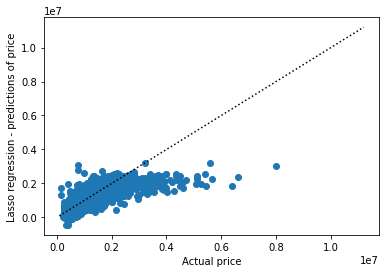

In [62]:
plt.figure()
plt.scatter(y_test, lasso_pred)
plt.plot([data_for_regression["Price"].min(), data_for_regression["Price"].max()], [data_for_regression["Price"].min(), data_for_regression["Price"].max()], 'k:')
plt.xlabel("Actual price")
plt.ylabel("Lasso regression - predictions of price")
plt.show()

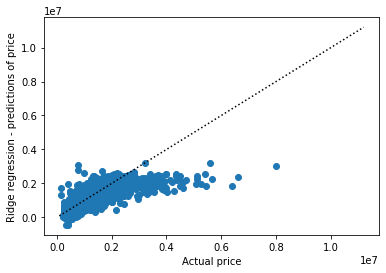

In [63]:
plt.figure()
plt.scatter(y_test, ridge_pred)
plt.plot([data_for_regression["Price"].min(), data_for_regression["Price"].max()], [data_for_regression["Price"].min(), data_for_regression["Price"].max()], 'k:')
plt.xlabel("Actual price")
plt.ylabel("Ridge regression - predictions of price")
plt.show()

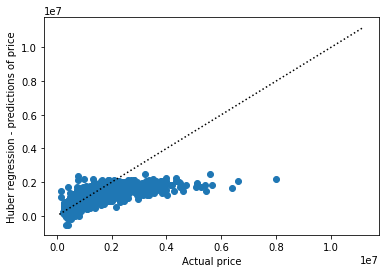

In [64]:
plt.figure()
plt.scatter(y_test, huber_pred)
plt.plot([data_for_regression["Price"].min(), data_for_regression["Price"].max()], [data_for_regression["Price"].min(), data_for_regression["Price"].max()], 'k:')
plt.xlabel("Actual price")
plt.ylabel("Huber regression - predictions of price")
plt.show()

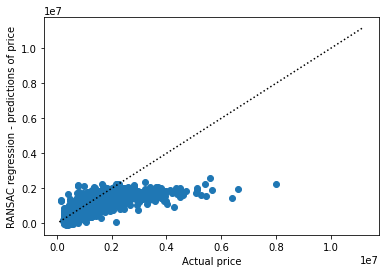

In [65]:
plt.figure()
plt.scatter(y_test, ransac_pred)
plt.plot([data_for_regression["Price"].min(), data_for_regression["Price"].max()], [data_for_regression["Price"].min(), data_for_regression["Price"].max()], 'k:')
plt.xlabel("Actual price")
plt.ylabel("RANSAC regression - predictions of price")
plt.show()

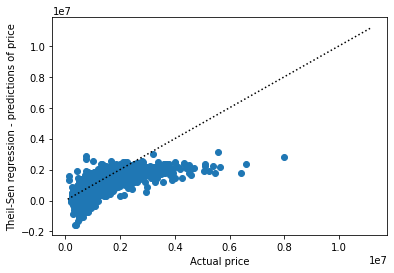

In [66]:
plt.figure()
plt.scatter(y_test, theilsen_pred)
plt.plot([data_for_regression["Price"].min(), data_for_regression["Price"].max()], [data_for_regression["Price"].min(), data_for_regression["Price"].max()], 'k:')
plt.xlabel("Actual price")
plt.ylabel("Theil-Sen regression - predictions of price")
plt.show()